# KICKSTARTER (final project)

**What is Kickstarter?**

Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others.

Every project creator sets their project's funding goal and deadline. If people like the project, they can pledge money to make it happen. If the project succeeds in reaching its funding goal, all backers' credit cards are charged when time expires. Funding on Kickstarter is all-or-nothing. If the project falls short of its funding goal, no one is charged.

**Objective**

Goal of this analysis it to be able to predict whether or not a project will receive it's goal funds.

**Data Source:**

https://webrobots.io/kickstarter-datasets/

## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from deep_translator import GoogleTranslator
import langid

# scipy libraries
from scipy import stats
from scipy.stats.mstats import winsorize

# statsmodels libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn libraries
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

# balancing libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## import data

In [2]:
from src.math_functions import create_dataframe

df = create_dataframe()

## first review and clean data

### review

In [3]:
print("This dataset contains {} rows and {} columns".format(*df.shape))

This dataset contains 543589 rows and 39 columns


In [4]:
df.sample(5)

backers_count                                              blurb  \
2852              2  Use my photos for a coffeetable book using pho...   
1956            121  Ein Bilderbuch für alle, die sich ganz doll li...   
458              26                      moved to another release date   
2459              7  Passionate Chef Needs your help creating a foo...   
849               5  An epic fantasy comic that takes place during ...   

                                               category  \
2852  {"id":275,"name":"Animals","analytics_name":"A...   
1956  {"id":46,"name":"Children's Books","analytics_...   
458   {"id":20,"name":"Conceptual Art","analytics_na...   
2459  {"id":311,"name":"Food Trucks","analytics_name...   
849   {"id":250,"name":"Comic Books","analytics_name...   

      converted_pledged_amount country country_displayable_name  created_at  \
2852                        11      US        the United States  1421856262   
1956                      3465      DE                  Germany  1611394105   
458                       1303      US        the United States  1367859472   
2459                       197      US        the United States  1552660736   
849                         30      GB       the United Kingdom  1615587229   

                                                creator currency  \
2852  {"id":1902764993,"name":"Janet Maddox","is_reg...      USD   
1956  {"id":1043615928,"name":"Jonas Fehling","slug"...      EUR   
458   {"id":217458266,"name":"Jennifer Hartsoe","is_...      USD   
2459  {"id":90110272,"name":"Passionate Chef LLC","s...      USD   
849   {"id":93038087,"name":"Strong Old Crusader","s...      GBP   

     currency_symbol  ...                                         source_url  \
2852               $  ...  https://www.kickstarter.com/discover/categorie...   
1956               €  ...  https://www.kickstarter.com/discover/categorie...   
458                $  ...  https://www.kickstarter.com/discover/categorie...   
2459               $  ...  https://www.kickstarter.com/discover/categorie...   
849                £  ...  https://www.kickstarter.com/discover/categorie...   

     spotlight  staff_pick       state state_changed_at  static_usd_rate  \
2852     False       False      failed       1424636127         1.000000   
1956      True       False  successful       1615648490         1.212886   
458      False       False    canceled       1378052030         1.000000   
2459     False       False      failed       1555764444         1.000000   
849      False       False        live       1616767038         1.370015   

                                                   urls  usd_pledged  \
2852  {"web":{"project":"https://www.kickstarter.com...    11.000000   
1956  {"web":{"project":"https://www.kickstarter.com...  3516.155644   
458   {"web":{"project":"https://www.kickstarter.com...  1303.000000   
2459  {"web":{"project":"https://www.kickstarter.com...   197.000000   
849   {"web":{"project":"https://www.kickstarter.com...    30.140331   

           usd_type  usd_exchange_rate  
2852  international                1.0  
1956  international                NaN  
458   international                NaN  
2459  international                NaN  
849   international                NaN  

[5 rows x 39 columns]

### review column names

In [5]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'usd_exchange_rate'],
      dtype='object')

no cleaning of column names required

### drop duplicates

In [6]:
from src.math_functions import drop_and_compare_duplicates

df = drop_and_compare_duplicates(df)

### drop duplicate projects with different values

In [7]:
from src.math_functions import drop_and_compare_duplicate_id

df = drop_and_compare_duplicate_id(df)

### extract category information

In [8]:
from src.math_functions import get_category_data

get_category_data('category', df)

backers_count                                              blurb  \
0                   4  Raising money to help my grandmother recover f...   
1                  11  My work is performance based but I branch out ...   
2                  18  A sanctuary for humans and felines alike! Come...   
3                  42  Taste Makers is a socially conscious brand tha...   
4                   3  All your herbal tea remedies here. From colds ...   
...               ...                                                ...   
202430             13  An oboe recital with music and photography to ...   
202431             52  Growing fish and produce year round in the "Po...   
202432             53  MOMENTS OF INSIGHT is a project consisting of ...   
202433              0  Would like to be able to photograph dream wedd...   
202434           2076  COLD, FRESH, & CARBONATED wherever you go! Cas...   

                                                 category  \
0       {"id":44,"name":"World Music","analytics_name"...   
1       {"id":24,"name":"Performance Art","analytics_n...   
2       {"id":314,"name":"Spaces","analytics_name":"Sp...   
3       {"id":269,"name":"Ready-to-wear","analytics_na...   
4       {"id":307,"name":"Drinks","analytics_name":"Dr...   
...                                                   ...   
202430  {"id":36,"name":"Classical Music","analytics_n...   
202431  {"id":305,"name":"Community Gardens","analytic...   
202432  {"id":20,"name":"Conceptual Art","analytics_na...   
202433  {"id":276,"name":"Fine Art","analytics_name":"...   
202434  {"id":307,"name":"Drinks","analytics_name":"Dr...   

        converted_pledged_amount country country_displayable_name  created_at  \
0                             62      US        the United States  1476879198   
1                            262      GB       the United Kingdom  1428415625   
2                            776      US        the United States  1445787145   
3                           2158      CA                   Canada  1426394434   
4                             96      US        the United States  1534903328   
...                          ...     ...                      ...         ...   
202430                       915      US        the United States  1375640768   
202431                      2460      CA                   Canada  1419960769   
202432                     18758      US        the United States  1303753700   
202433                         0      CA                   Canada  1404849038   
202434                    304142      US        the United States  1417200147   

                                                  creator currency  \
0       {"id":1501687606,"name":"Devan Porter","is_reg...      USD   
1       {"id":923770533,"name":"Fiona Powell","is_regi...      GBP   
2       {"id":920978851,"name":"Tori","is_registered":...      USD   
3       {"id":1827655104,"name":"Taste Makers By Trish...      CAD   
4       {"id":160842473,"name":"Vito Finazzo","is_regi...      USD   
...                                                   ...      ...   
202430  {"id":1763180118,"name":"Jennifer Stucki","is_...      USD   
202431  {"id":1810768137,"name":"Earl Decker","is_regi...      CAD   
202432  {"id":1743305220,"name":"Chaucer Silverson","i...      USD   
202433  {"id":667466823,"name":"Laura","is_registered"...      CAD   
202434  {"id":584321487,"name":"Drink Tanks","is_regis...      USD   

       currency_symbol  ...  staff_pick       state  state_changed_at  \
0                    $  ...       False      failed        1479479560   
1                    £  ...       False  successful        1430946012   
2                    $  ...       False      failed        1448555133   
3                    $  ...        True      failed        1438280891   
4                    $  ...       False      failed        1540093916   
...                ...  ...         ...         ...               ...   
202430               $  ...       Fal

### convert timestamps

In [9]:
from src.math_functions import get_data_from_timestamp

get_data_from_timestamp('created_at', df)
get_data_from_timestamp('launched_at', df)
get_data_from_timestamp('deadline', df)

backers_count                                              blurb  \
0                   4  Raising money to help my grandmother recover f...   
1                  11  My work is performance based but I branch out ...   
2                  18  A sanctuary for humans and felines alike! Come...   
3                  42  Taste Makers is a socially conscious brand tha...   
4                   3  All your herbal tea remedies here. From colds ...   
...               ...                                                ...   
202430             13  An oboe recital with music and photography to ...   
202431             52  Growing fish and produce year round in the "Po...   
202432             53  MOMENTS OF INSIGHT is a project consisting of ...   
202433              0  Would like to be able to photograph dream wedd...   
202434           2076  COLD, FRESH, & CARBONATED wherever you go! Cas...   

                                                 category  \
0       {"id":44,"name":"World Music","analytics_name"...   
1       {"id":24,"name":"Performance Art","analytics_n...   
2       {"id":314,"name":"Spaces","analytics_name":"Sp...   
3       {"id":269,"name":"Ready-to-wear","analytics_na...   
4       {"id":307,"name":"Drinks","analytics_name":"Dr...   
...                                                   ...   
202430  {"id":36,"name":"Classical Music","analytics_n...   
202431  {"id":305,"name":"Community Gardens","analytic...   
202432  {"id":20,"name":"Conceptual Art","analytics_na...   
202433  {"id":276,"name":"Fine Art","analytics_name":"...   
202434  {"id":307,"name":"Drinks","analytics_name":"Dr...   

        converted_pledged_amount country country_displayable_name  created_at  \
0                             62      US        the United States  1476879198   
1                            262      GB       the United Kingdom  1428415625   
2                            776      US        the United States  1445787145   
3                           2158      CA                   Canada  1426394434   
4                             96      US        the United States  1534903328   
...                          ...     ...                      ...         ...   
202430                       915      US        the United States  1375640768   
202431                      2460      CA                   Canada  1419960769   
202432                     18758      US        the United States  1303753700   
202433                         0      CA                   Canada  1404849038   
202434                    304142      US        the United States  1417200147   

                                                  creator currency  \
0       {"id":1501687606,"name":"Devan Porter","is_reg...      USD   
1       {"id":923770533,"name":"Fiona Powell","is_regi...      GBP   
2       {"id":920978851,"name":"Tori","is_registered":...      USD   
3       {"id":1827655104,"name":"Taste Makers By Trish...      CAD   
4       {"id":160842473,"name":"Vito Finazzo","is_regi...      USD   
...                                                   ...      ...   
202430  {"id":1763180118,"name":"Jennifer Stucki","is_...      USD   
202431  {"id":1810768137,"name":"Earl Decker","is_regi...      CAD   
202432  {"id":1743305220,"name":"Chaucer Silverson","i...      USD   
202433  {"id":667466823,"name":"Laura","is_registered"...      CAD   
202434  {"id":584321487,"name":"Drink Tanks","is_regis...      USD   

       currency_symbol  ...  category_parent_name created_at_date  \
0                    $  ...                 Music      2016-10-19   
1                    £  ...                   Art      2015-04-07   
2                    $  ...                  Food      2015-10-25   
3                    $  ...               Fashion      2015-03-15   
4                    $  ...                  Food      2018-08-22   
...                ...  ...                   ...             ...   
202430               $  ...                 Music      2013-08-04

### add project duration column

In [10]:
# time between deadline and launched

project_duration = []

for i,j in zip(df.deadline, df.launched_at):
    a = ((i - j) / 60 / 60 / 24)
    project_duration.append(a)
    
df['project_duration'] = project_duration

### define target column

The target for this analysis is going to be wether or not a project will be successfully funded or not. This information is currently stored in the state column. So I will start by looking at the unique values in the state column.

In [11]:
df['state'].value_counts()

successful    108652
failed         75902
canceled        9370
live            8511
Name: state, dtype: int64

There are 4 different unique values 'successful', 'failed', 'canceled', 'live'. I definetly don't want to include the projects that are still 'live' and I don't know the reason why projects have been 'canceled'. I will therefore only keep the 'successful' and 'failed' projects.

In [12]:
df = df[(df['state']=='successful') | (df['state']=='failed')]

In [13]:
df['state'].value_counts()

successful    108652
failed         75902
Name: state, dtype: int64

### extract language/text information

#### add language column

In [ ]:
from src.language_functions import add_language_column

add_language_column('blurb', df)
add_language_column('name', df)

#### remove digits from blurb and name

In [4]:
df.blurb = df.blurb.str.replace('\d+', '')

In [5]:
df.name = df.name.str.replace('\d+', '')

#### steps to tranlate blurb

In [6]:
to_translate = df[df['blurb_language']!='en']
not_translate = df[df['blurb_language']=='en']                  

In [7]:
trans = []

for i in to_translate['blurb']:
    if isinstance(i, float):
        trans.append('')
    else:
        if len(i) >= 5000:
            trans.append('')
        else:
            a = GoogleTranslator(source='auto', target='en').translate(i)
            trans.append(a)
    
to_translate['description'] = trans

In [8]:
not_translate['description'] = not_translate['blurb']

In [9]:
df = pd.concat([not_translate, to_translate], ignore_index=True)

#### steps to tranlate name

In [11]:
to_translate = df[df['name_language']!='en']
not_translate = df[df['name_language']=='en']         

In [12]:
trans = []

for i in to_translate['name']:
    if isinstance(i, float):
        trans.append('')
    else:
        if len(i) >= 5000:
            trans.append('')
        else:
            a = GoogleTranslator(source='auto', target='en').translate(i)
            trans.append(a)
    
to_translate['title'] = trans

In [13]:
not_translate['title'] = not_translate['name']

In [14]:
df = pd.concat([not_translate, to_translate], ignore_index=True)

#### group minority languages and countries as 'other'

In [3]:
from src.language_functions import group_columns

group_columns('blurb_language', df, 100)
group_columns('name_language', df, 100)
group_columns('country', df, 1000)

Unnamed: 0  Unnamed: 0.1  backers_count  \
0                0             0              4   
1                1             1             11   
2                2             2             18   
3                3             3             42   
4                4             4              3   
...            ...           ...            ...   
184549      184549        202241              2   
184550      184550        202260           1635   
184551      184551        202271            103   
184552      184552        202312              0   
184553      184553        202406           2098   

                                                    blurb  \
0       Raising money to help my grandmother recover f...   
1       My work is performance based but I branch out ...   
2       A sanctuary for humans and felines alike! Come...   
3       Taste Makers is a socially conscious brand tha...   
4       All your herbal tea remedies here. From colds ...   
...                                                   ...   
184549  Anime, manga, novelas ligeras, novelas visuale...   
184550  A next generation adventure role playing video...   
184551  Make : Limited Edition Cherry Blossom Bunny En...   
184552  Das Leben des Beschrieben Autors sowie Regisse...   
184553            粵語文學期刊\nCantonese Literature Periodical   

                                                 category  \
0       {"id":44,"name":"World Music","analytics_name"...   
1       {"id":24,"name":"Performance Art","analytics_n...   
2       {"id":314,"name":"Spaces","analytics_name":"Sp...   
3       {"id":269,"name":"Ready-to-wear","analytics_na...   
4       {"id":307,"name":"Drinks","analytics_name":"Dr...   
...                                                   ...   
184549  {"id":51,"name":"Software","analytics_name":"S...   
184550  {"id":35,"name":"Video Games","analytics_name"...   
184551  {"id":22,"name":"Illustration","analytics_name...   
184552  {"id":298,"name":"Movie Theaters","analytics_n...   
184553  {"id":326,"name":"Literary Journals","analytic...   

        converted_pledged_amount country country_displayable_name  created_at  \
0                             62      US        the United States  1476879198   
1                            262      GB       the United Kingdom  1428415625   
2                            776      US        the United States  1445787145   
3                           2158      CA                   Canada  1426394434   
4                             96      US        the United States  1534903328   
...                          ...     ...                      ...         ...   
184549                       449      MX                   Mexico  1590515019   
184550                    227660      US        the United States  1465917117   
184551                      1529      DE                  Germany  1580208606   
184552                         0      DE                  Germany  1460219203   
184553                     53521      HK                Hong Kong  1590728384   

                                                  creator  ... deadline_time  \
0       {"id":1501687606,"name":"Devan Porter","is_reg...  ...      15:32:40   
1       {"id":923770533,"name":"Fiona Powell","is_regi...  ...      23:00:00   
2       {"id":920978851,"name":"Tori","is_registered":...  ...      17:25:33   
3       {"id":1827655104,"name":"Taste Makers By Trish...  ...      20:28:11   
4       {"id":160842473,"name":"Vito Finazzo","is_regi...  ...      05:51:56   
...                                                   ...  ...           ...   
184549  {"id":1471482632,"name":"Eduardo Posada Sanche...  ...      02:22:24   
184550  {"id":1117197248,"name":"PlayFusion","slug":"p...  ...      17:17:39   
184551  {"id":152524115,"name":"Risu","slug":"risu","i...  ...      18:00:03   
184552  {"id":1581817379,"name":"Martin latsch","is_re...  ...      18:15:03   
184553  {"id":1008745027,"name":"ResonateMagazine","is...  ...      02:57:39

In [16]:
df.sample(5)

Unnamed: 0  Unnamed: 0.1  backers_count  \
86247        86247        118171             67   
112536      112536        154284              0   
62265        62265         85318              4   
158722      158722         57361              0   
81826        81826        112104              0   

                                                    blurb  \
86247   World renowned dance studio Millennium Dance C...   
112536  Catering with real food made from scratch with...   
62265   Official promotional posters for the film, Sta...   
158722  Insomnia skis is an e-commerce website which a...   
81826    Inserting Abisay Puentes' Music in his paintings   

                                                 category  \
86247   {"id":24,"name":"Performance Art","analytics_n...   
112536  {"id":308,"name":"Events","analytics_name":"Ev...   
62265   {"id":20,"name":"Conceptual Art","analytics_na...   
158722  {"id":335,"name":"Fabrication Tools","analytic...   
81826   {"id":23,"name":"Painting","analytics_name":"P...   

        converted_pledged_amount country country_displayable_name  created_at  \
86247                      22740      US        the United States  1420499756   
112536                         0      NO                   Norway  1447682103   
62265                       5042      US        the United States  1578862180   
158722                         0      CA                   Canada  1423232665   
81826                          0      US        the United States  1463926223   

                                                  creator  ... deadline_time  \
86247   {"id":1777959619,"name":"Madeline Augustine","...  ...      08:30:00   
112536  {"id":1791034185,"name":"Stein Hansen","is_reg...  ...      16:02:30   
62265   {"id":1427077015,"name":"Freddy","is_registere...  ...      22:40:21   
158722  {"id":1904370479,"name":"AJBadner","is_registe...  ...      18:00:00   
81826   {"id":2091603391,"name":"Abisay Puentes","is_r...  ...      02:22:25   

       deadline_weekday  project_duration blurb_language  name_language  \
86247            Monday         39.438542             en             en   
112536           Sunday         30.000000             en             en   
62265          Saturday         30.000000             en             en   
158722         Thursday         55.047315             en             pt   
81826          Saturday         20.000000             en             en   

                                              description  \
86247   World renowned dance studio Millennium Dance C...   
112536  Catering with real food made from scratch with...   
62265   Official promotional posters for the film, Sta...   
158722  Insomnia skis is an e-commerce website which a...   
81826    Inserting Abisay Puentes' Music in his paintings   

                                                    title  blurb_language_new  \
86247   Millennium Dance Complex Orange County- Dance ...                  en   
112536       Cateringhuset, amazing cooking for everyone!                  en   
62265         Star Wars: Yoda's Nightmare - Movie Posters                  en   
158722                           I N S O M N I A  S K I S                  en   
81826                  PAINTINGS AND THEIR INTERIOR MUSIC                  en   

        name_language_new  country_new  
86247                  en           US  
112536                 en        other  
62265                  en           US  
158722                 pt           CA  
81826                  en           US  

[5 rows x 60 columns]

### NLTK - Natural Language Toolkit

In [5]:
from src.language_functions import nltk_features

nltk_features('description', df)
nltk_features('title', df)

Unnamed: 0  Unnamed: 0.1  backers_count  \
0                0             0              4   
1                1             1             11   
2                2             2             18   
3                3             3             42   
4                4             4              3   
...            ...           ...            ...   
184549      184549        202241              2   
184550      184550        202260           1635   
184551      184551        202271            103   
184552      184552        202312              0   
184553      184553        202406           2098   

                                                    blurb  \
0       Raising money to help my grandmother recover f...   
1       My work is performance based but I branch out ...   
2       A sanctuary for humans and felines alike! Come...   
3       Taste Makers is a socially conscious brand tha...   
4       All your herbal tea remedies here. From colds ...   
...                                                   ...   
184549  Anime, manga, novelas ligeras, novelas visuale...   
184550  A next generation adventure role playing video...   
184551  Make : Limited Edition Cherry Blossom Bunny En...   
184552  Das Leben des Beschrieben Autors sowie Regisse...   
184553            粵語文學期刊\nCantonese Literature Periodical   

                                                 category  \
0       {"id":44,"name":"World Music","analytics_name"...   
1       {"id":24,"name":"Performance Art","analytics_n...   
2       {"id":314,"name":"Spaces","analytics_name":"Sp...   
3       {"id":269,"name":"Ready-to-wear","analytics_na...   
4       {"id":307,"name":"Drinks","analytics_name":"Dr...   
...                                                   ...   
184549  {"id":51,"name":"Software","analytics_name":"S...   
184550  {"id":35,"name":"Video Games","analytics_name"...   
184551  {"id":22,"name":"Illustration","analytics_name...   
184552  {"id":298,"name":"Movie Theaters","analytics_n...   
184553  {"id":326,"name":"Literary Journals","analytic...   

        converted_pledged_amount country country_displayable_name  created_at  \
0                             62      US        the United States  1476879198   
1                            262      GB       the United Kingdom  1428415625   
2                            776      US        the United States  1445787145   
3                           2158      CA                   Canada  1426394434   
4                             96      US        the United States  1534903328   
...                          ...     ...                      ...         ...   
184549                       449      MX                   Mexico  1590515019   
184550                    227660      US        the United States  1465917117   
184551                      1529      DE                  Germany  1580208606   
184552                         0      DE                  Germany  1460219203   
184553                     53521      HK                Hong Kong  1590728384   

                                                  creator  ... name_language  \
0       {"id":1501687606,"name":"Devan Porter","is_reg...  ...            en   
1       {"id":923770533,"name":"Fiona Powell","is_regi...  ...            en   
2       {"id":920978851,"name":"Tori","is_registered":...  ...            en   
3       {"id":1827655104,"name":"Taste Makers By Trish...  ...            en   
4       {"id":160842473,"name":"Vito Finazzo","is_regi...  ...            en   
...                                                   ...  ...           ...   
184549  {"id":1471482632,"name":"Eduardo Posada Sanche...  ...            es   
184550  {"id":1117197248,"name":"PlayFusion","slug":"p...  ...            nl   
184551  {"id":152524115,"name":"Risu","slug":"risu","i...  ...            no   
184552  {"id":1581817379,"name":"Martin latsch","is_re...  ...            de   
184553  {"id":1008745027,"name":"ResonateMagazine","is...  ...            zh

In [6]:
from src.language_functions import nltk_sentiment

nltk_sentiment('description', df)
nltk_sentiment('title', df)

Unnamed: 0  Unnamed: 0.1  backers_count  \
0                0             0              4   
1                1             1             11   
2                2             2             18   
3                3             3             42   
4                4             4              3   
...            ...           ...            ...   
184549      184549        202241              2   
184550      184550        202260           1635   
184551      184551        202271            103   
184552      184552        202312              0   
184553      184553        202406           2098   

                                                    blurb  \
0       Raising money to help my grandmother recover f...   
1       My work is performance based but I branch out ...   
2       A sanctuary for humans and felines alike! Come...   
3       Taste Makers is a socially conscious brand tha...   
4       All your herbal tea remedies here. From colds ...   
...                                                   ...   
184549  Anime, manga, novelas ligeras, novelas visuale...   
184550  A next generation adventure role playing video...   
184551  Make : Limited Edition Cherry Blossom Bunny En...   
184552  Das Leben des Beschrieben Autors sowie Regisse...   
184553            粵語文學期刊\nCantonese Literature Periodical   

                                                 category  \
0       {"id":44,"name":"World Music","analytics_name"...   
1       {"id":24,"name":"Performance Art","analytics_n...   
2       {"id":314,"name":"Spaces","analytics_name":"Sp...   
3       {"id":269,"name":"Ready-to-wear","analytics_na...   
4       {"id":307,"name":"Drinks","analytics_name":"Dr...   
...                                                   ...   
184549  {"id":51,"name":"Software","analytics_name":"S...   
184550  {"id":35,"name":"Video Games","analytics_name"...   
184551  {"id":22,"name":"Illustration","analytics_name...   
184552  {"id":298,"name":"Movie Theaters","analytics_n...   
184553  {"id":326,"name":"Literary Journals","analytic...   

        converted_pledged_amount country country_displayable_name  created_at  \
0                             62      US        the United States  1476879198   
1                            262      GB       the United Kingdom  1428415625   
2                            776      US        the United States  1445787145   
3                           2158      CA                   Canada  1426394434   
4                             96      US        the United States  1534903328   
...                          ...     ...                      ...         ...   
184549                       449      MX                   Mexico  1590515019   
184550                    227660      US        the United States  1465917117   
184551                      1529      DE                  Germany  1580208606   
184552                         0      DE                  Germany  1460219203   
184553                     53521      HK                Hong Kong  1590728384   

                                                  creator  ... title_word  \
0       {"id":1501687606,"name":"Devan Porter","is_reg...  ...          4   
1       {"id":923770533,"name":"Fiona Powell","is_regi...  ...          1   
2       {"id":920978851,"name":"Tori","is_registered":...  ...         12   
3       {"id":1827655104,"name":"Taste Makers By Trish...  ...          5   
4       {"id":160842473,"name":"Vito Finazzo","is_regi...  ...          2   
...                                                   ...  ...        ...   
184549  {"id":1471482632,"name":"Eduardo Posada Sanche...  ...         10   
184550  {"id":1117197248,"name":"PlayFusion","slug":"p...  ...          1   
184551  {"id":152524115,"name":"Risu","slug":"risu","i...  ...          4   
184552  {"id":1581817379,"name":"Martin latsch","is_re...  ...          8   
184553  {"id":1008745027,"name":"ResonateMagazine","is...  ...          6   

       title_sent  description_

#### create backup dataframe

In [9]:
df.to_csv('nltk_backup.csv', index=False)

In [27]:
df = pd.read_csv('nltk_backup.csv')

In [28]:
df.sample(5)

Unnamed: 0  Unnamed: 0.1  backers_count  \
182041      182041        109832             43   
46258        46258         63366             41   
134178      134178        184117             14   
18982        18982         25882            401   
92246        92246        126394             39   

                                                    blurb  \
182041  Collection  de maillots de bain éco-responsabl...   
46258   We are a premium undergarments brand that make...   
134178  Chain ‘Em Up is an affordable non-skid ramp th...   
18982   A witchy hard enamel pin set with gold finish,...   
92246   A set of  mixed-media pieces seeking to open a...   

                                                 category  \
182041  {"id":269,"name":"Ready-to-wear","analytics_na...   
46258   {"id":263,"name":"Apparel","analytics_name":"A...   
134178  {"id":52,"name":"Hardware","slug":"technology/...   
18982   {"id":22,"name":"Illustration","analytics_name...   
92246   {"id":54,"name":"Mixed Media","analytics_name"...   

        converted_pledged_amount country country_displayable_name  created_at  \
182041                     26515      GB       the United Kingdom  1576836978   
46258                       5600      US        the United States  1498971661   
134178                      7223      US        the United States  1489859213   
18982                      22910      IT                    Italy  1576255310   
92246                       1346      US        the United States  1396373440   

                                                  creator  ... title_word  \
182041  {"id":533207675,"name":"Jessica Pires","slug":...  ...          2   
46258   {"id":1280514690,"name":"Roderick James","is_r...  ...          7   
134178  {"id":1392506935,"name":"Lisa Murray","is_regi...  ...         13   
18982   {"id":366991546,"name":"Layla Ashtar","slug":"...  ...         11   
92246   {"id":1856945474,"name":"Sarah Robicheau","is_...  ...          5   

       title_sent  description_neg description_neu  description_pos  \
182041          1            0.000           1.000            0.000   
46258           1            0.000           0.881            0.119   
134178          1            0.000           0.772            0.228   
18982           1            0.081           0.694            0.225   
92246           1            0.108           0.892            0.000   

        description_compound  title_neg  title_neu  title_pos  title_compound  
182041                0.0000      0.000      1.000      0.000          0.0000  
46258                 0.4019      0.000      0.582      0.418          0.5563  
134178                0.6808      0.000      1.000      0.000          0.0000  
18982                 0.5423      0.285      0.715      0.000         -0.4199  
92246                -0.3182      0.000      1.000      0.000          0.0000  

[5 rows x 72 columns]

In [ ]:
# count stopwords

In [34]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
 
for i in df['description']:
 
    word_tokens = word_tokenize(i)
 
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
 
print(word_tokens)
print(filtered_sentence)

TypeError: expected string or bytes-like object

In [42]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
 
for i in df['description']:
 
    word_tokens = word_tokenize(i)
 
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
    filtered_sentence = []
    
    new_column = []
    
    new_column.append(filtered_sentence)
    
df['new_column'] = new_column

TypeError: expected string or bytes-like object

In [44]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
 
for i in df['description']:
 
    t = word_tokenize(i)
    
    new_column = []
    
    new_column.append(t)
    
df['new_column'] = new_column

TypeError: expected string or bytes-like object

In [37]:
word_tokens = word_tokenize(df['description'][0])
word_tokens

['Raising',
 'money',
 'to',
 'help',
 'my',
 'grandmother',
 'recover',
 'from',
 'her',
 'stroke',
 ',',
 'i',
 "'ve",
 'created',
 'an',
 'Alternative',
 'EP',
 'for',
 'people',
 'to',
 'stream',
 'in',
 'order',
 'to',
 'help',
 'her',
 '.']

In [39]:
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
filtered_sentence

['Raising',
 'money',
 'help',
 'grandmother',
 'recover',
 'stroke',
 ',',
 "'ve",
 'created',
 'Alternative',
 'EP',
 'people',
 'stream',
 'order',
 'help',
 '.']

In [ ]:
# remove stopwords from keyword base

In [ ]:
# get pos_tag for keyword base

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist()

for word in text_tokens:
    fdist[word.lower()]+=1
fdist

len(fdist)

In [ ]:
fdist_top10 = fdist.most_common(10)

In [ ]:
# number of paragraphs

from nltk.tokenize import blankline_tokenize
pf_blank = blankline_tokenize(pf)
len(pf_blank)

In [ ]:
for token in pf_tokens:
    print(nltk.pos_tag([token]))

### set id as index

In [13]:
df = df.set_index('id')

### drop columns

In [26]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'country_displayable_name',
       'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type',
       'usd_exchange_rate', 'category_slug', 'category_parent_name',
       'created_at_date', 'created_at_time', 'created_at_weekday',
       'launched_at_date', 'launched_at_time', 'launched_at_weekday',
       'deadline_date', 'deadline_time', 'deadline_weekday',
       'project_duration', 'blurb_language', 'name_language', 'description',
       'title', 'blurb_lan

In [27]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1','backers_count', 'blurb', 'category', 'converted_pledged_amount',
           'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'usd_exchange_rate', 'category_slug', 'id', 'deadline_date',
        'deadline_time', 'launched_at_date', 'launched_at_time','created_at_date', 'created_at_time',
          'description', 'title','blurb_language', 'name_language', 'country', ]

In [28]:
df = df.drop(to_drop, axis=1)

In [29]:
df.shape

(184554, 22)

In [30]:
df.columns

Index(['goal', 'state', 'category_parent_name', 'created_at_weekday',
       'launched_at_weekday', 'deadline_weekday', 'project_duration',
       'blurb_language_new', 'name_language_new', 'country_new',
       'description_word', 'description_sent', 'title_word', 'title_sent',
       'description_neg', 'description_neu', 'description_pos',
       'description_compound', 'title_neg', 'title_neu', 'title_pos',
       'title_compound'],
      dtype='object')

### drop null values

In [31]:
df = df.dropna()

### final review of shape and backup analysis/model dataframe

In [32]:
# final shape of cleaned data

print("The cleaned and adjusted dataset contains {} rows and {} columns".format(*df.shape))

The cleaned and adjusted dataset contains 176721 rows and 22 columns


In [22]:
df.to_csv('analysis_model_df.csv')

In [23]:
df = pd.read_csv('analysis_model_df.csv')

In [11]:
df.sample(5)

country    goal          id       state category_parent_name  \
49870       US  5000.0   723987043  successful         Film & Video   
48056       US  4000.0   697322456  successful           Publishing   
36844       US  1500.0   536010550  successful           Publishing   
175085      CA   600.0  1845952016      failed          Photography   
26193       US  2285.0   379449487  successful           Publishing   

       created_at_date created_at_time created_at_weekday launched_at_date  \
49870       2014-04-14        20:03:40             Monday       2014-09-01   
48056       2016-10-18        18:16:43            Tuesday       2016-10-22   
36844       2014-01-21        04:43:16            Tuesday       2014-01-24   
175085      2018-06-22        15:46:53             Friday       2018-06-23   
26193       2017-01-04        18:36:32          Wednesday       2017-01-17   

       launched_at_time  ... title_word title_sent description_neg  \
49870          06:00:35  ...          9          1           0.000   
48056          19:52:07  ...          2          1           0.000   
36844          19:36:23  ...         11          1           0.070   
175085         04:44:13  ...          6          1           0.000   
26193          13:51:08  ...         14          3           0.091   

       description_neu  description_pos description_compound title_neg  \
49870            0.444            0.556               0.3612     0.342   
48056            0.785            0.215               0.4767     0.000   
36844            0.846            0.085               0.0821     0.000   
175085           0.688            0.312               0.6114     0.000   
26193            0.586            0.322               0.7959     0.000   

       title_neu title_pos title_compound  
49870      0.658     0.000        -0.3818  
48056      1.000     0.000         0.0000  
36844      0.598     0.402         0.5719  
175085     1.000     0.000         0.0000  
26193      0.488     0.512         0.8555  

[5 rows x 34 columns]

### split numeric and categorical data

In [14]:
num_df = df.select_dtypes(include = np.number)
cat_df = df.select_dtypes(include = object)

## Exploratory Data Analysis

### validate target variable

"As of July 2021, the success rate of fully funding a project on the crowdfunding website was 38.92 percent. Overall, 5.4 billion U.S. dollars have gone into successfully launched projects."

https://www.statista.com/statistics/235405/kickstarter-project-funding-success-rate/

In [15]:
data_crosstab = pd.crosstab(df['category_parent_name'], df['state'], margins = False)
data_crosstab

state                 failed  successful
category_parent_name                    
Art                     7866       11029
Comics                   740        6047
Crafts                  3728        1484
Dance                    691        1025
Design                  2589        4144
Fashion                 3596        6256
Film & Video           10228       15077
Food                    9998        4284
Games                   3422        7861
Journalism              2594         824
Music                   8235       17042
Photography             3697        2202
Publishing              5488       13013
Technology             11000        7851
Theater                 1850        2865

### numerical variables

In [16]:
num_df.describe()

goal            id  project_duration  description_word  \
count  1.845540e+05  1.845540e+05     184554.000000     184554.000000   
mean   5.112085e+04  1.073154e+09         32.946577         20.459139   
std    1.190780e+06  6.189900e+08         12.230402          6.353769   
min    1.000000e-02  1.852000e+04          1.000000          1.000000   
25%    1.500000e+03  5.368844e+08         29.958333         17.000000   
50%    5.000000e+03  1.072980e+09         30.000000         22.000000   
75%    1.500000e+04  1.608760e+09         35.000000         25.000000   
max    1.000000e+08  2.147476e+09        120.589687        107.000000   

       description_sent     title_word     title_sent  description_neg  \
count     184554.000000  184554.000000  184554.000000    184549.000000   
mean           1.433922       6.303792       1.046285         0.038769   
std            0.710586       3.153112       0.233505         0.085453   
min            1.000000       1.000000       1.000000         0.000000   
25%            1.000000       4.000000       1.000000         0.000000   
50%            1.000000       6.000000       1.000000         0.000000   
75%            2.000000       9.000000       1.000000         0.000000   
max           15.000000      32.000000       7.000000         1.000000   

       description_neu  description_pos  description_compound      title_neg  \
count    184549.000000    184549.000000         184549.000000  184554.000000   
mean          0.801226         0.159929              0.288084       0.040891   
std           0.158560         0.147381              0.413870       0.132866   
min           0.000000         0.000000             -0.988700       0.000000   
25%           0.693000         0.000000              0.000000       0.000000   
50%           0.810000         0.144000              0.350600       0.000000   
75%           0.942000         0.259000              0.636900       0.000000   
max           1.000000         1.000000              0.983700       1.000000   

           title_neu      title_pos  title_compound  
count  184554.000000  184554.000000   184554.000000  
mean        0.857170       0.101592        0.069462  
std         0.226147       0.192746        0.260742  
min         0.000000       0.000000       -0.962800  
25%         0.694000       0.000000        0.000000  
50%         1.000000       0.000000        0.000000  
75%         1.000000       0.000000        0.000000  
max         1.000000       1.000000        0.960100

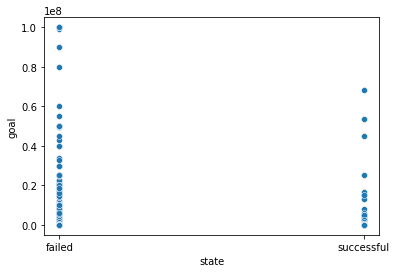

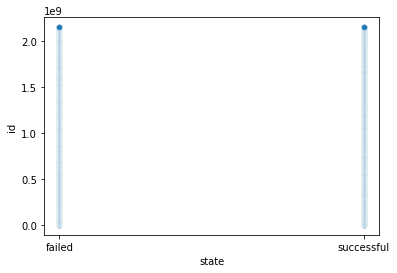

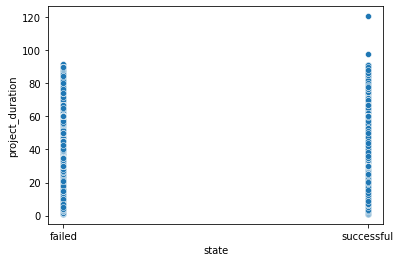

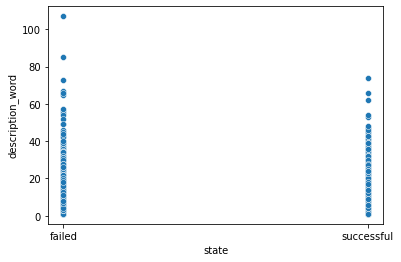

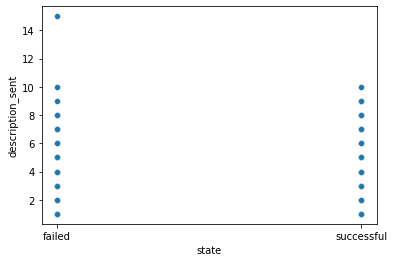

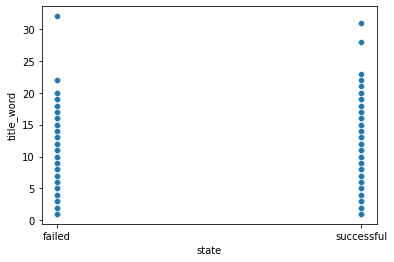

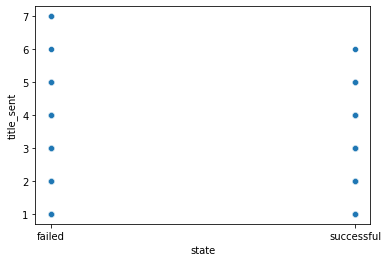

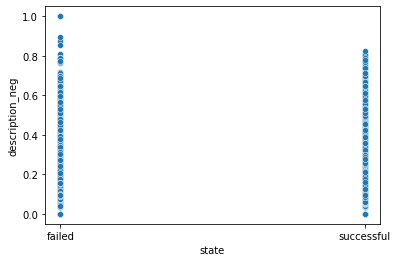

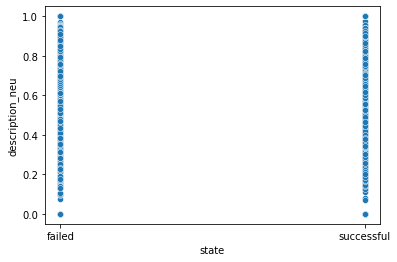

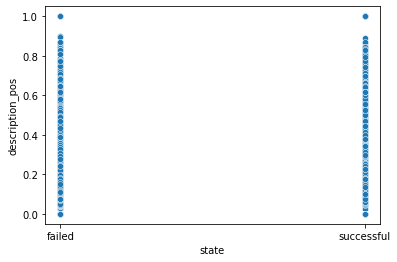

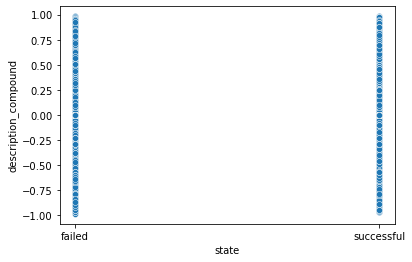

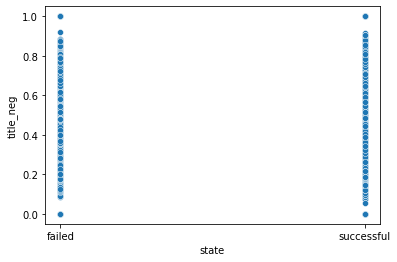

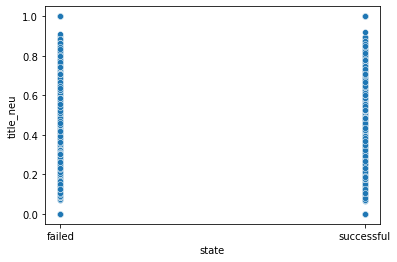

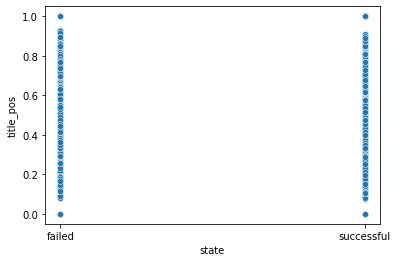

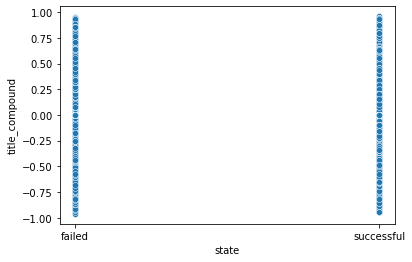

In [17]:
for column in df.select_dtypes(np.number).columns:
    sns.scatterplot(data=df, x="state", y=(df[column]))
    plt.show()

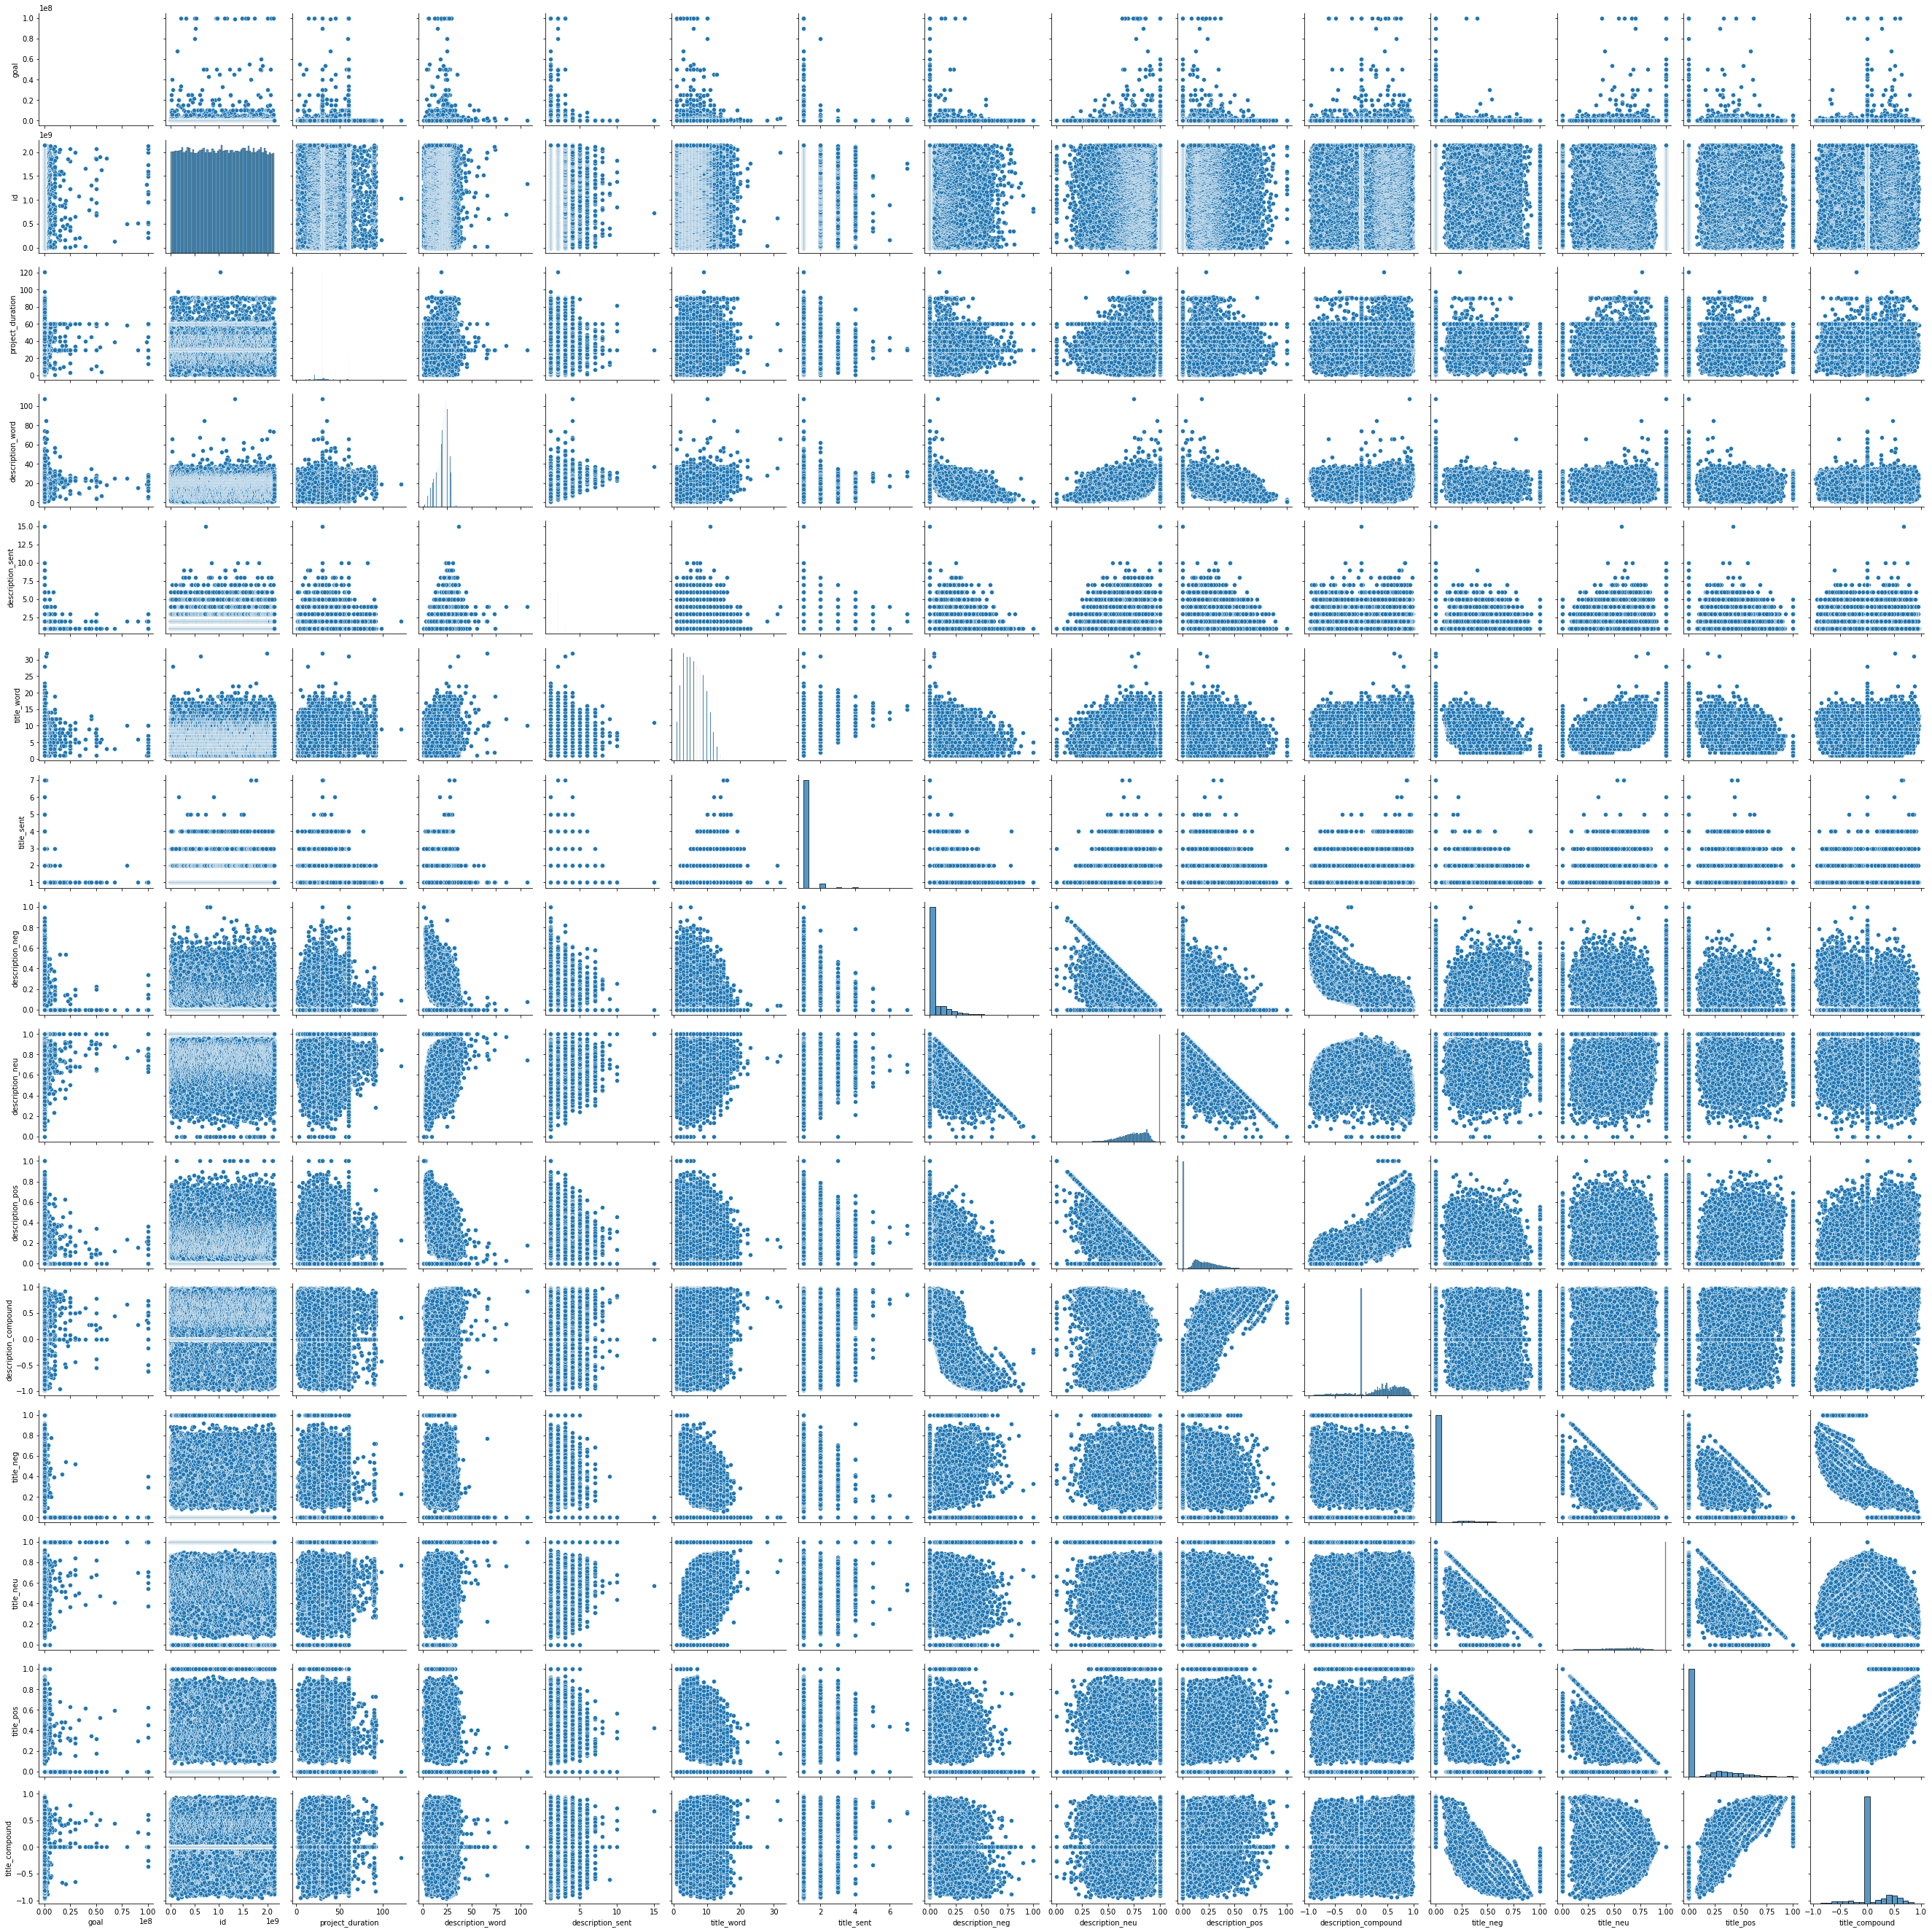

In [18]:
sns.pairplot(num_df)

#### check normal distribution

### categorical variables

#### wordcloud

https://www.datacamp.com/community/tutorials/wordcloud-python

https://www.searchenginejournal.com/predict-content-success-python/387064/#close

In [38]:
?WordCloud

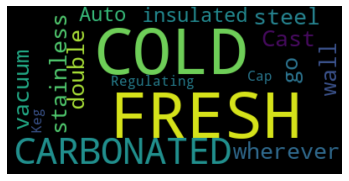

In [40]:
# Start with one review:
text = df['blurb'].iloc[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in project description',fontsize = 30)
plt.show()

TypeError: sequence item 3799: expected str instance, float found

### mixed analysis

### projects per weekday

In [46]:
df.groupby(["target"])["funded_rate"].mean().sort_values(ascending=False)

target
True     10.350080
False     0.117567
Name: funded_rate, dtype: float64

### projects per category

category_parent_name

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(df['category_parent_name'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [ ]:
# top 30 runtime movies on Hulu = projects with top funding_rate
top_30_screenplay = hulu_movies.sort_values(by = 'screenplay', ascending = False).head(30)
plt.figure(figsize = (15, 10))
sns.barplot(data = top_30_screenplay, y = 'Title', x = 'screenplay', hue = 'Country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')
plt.show()

### Check for Correlation

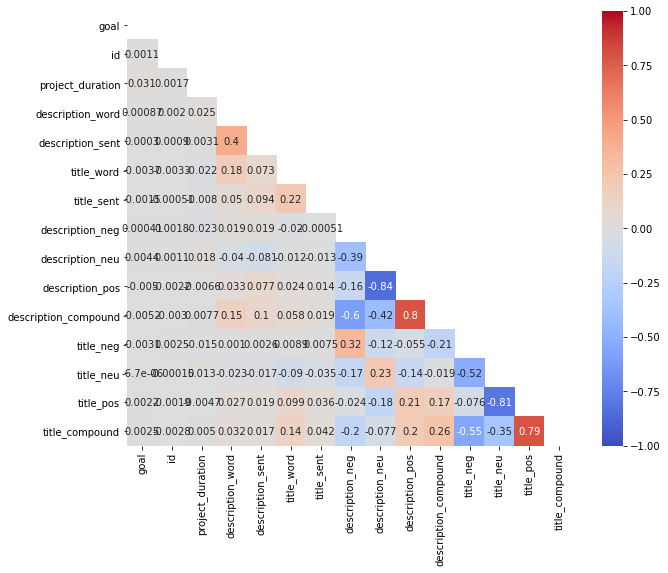

In [20]:
#round(df.corr()['death_event'].sort_values(ascending=False),2)

# create correlation heatmap 

mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.show()

## outliers

### check for outliers in num_df

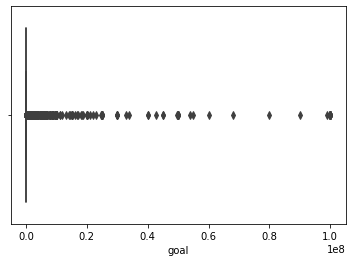

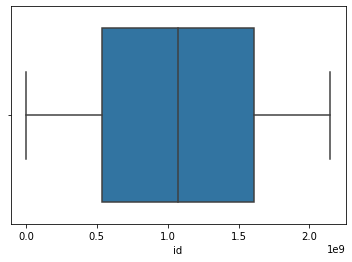

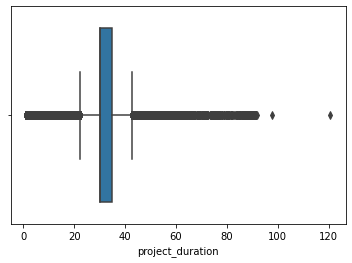

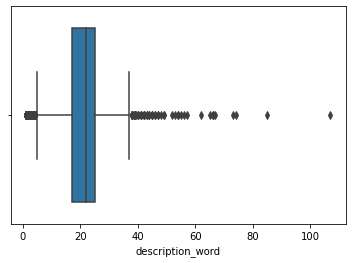

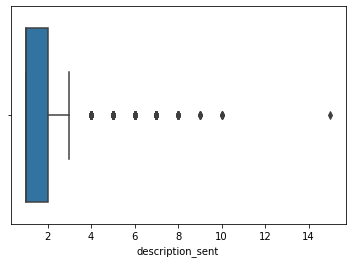

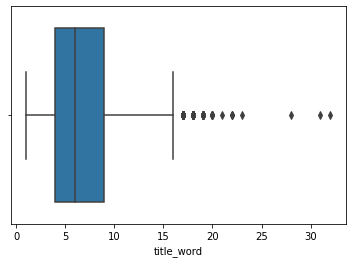

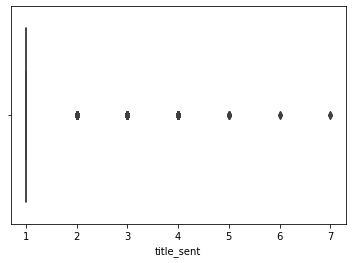

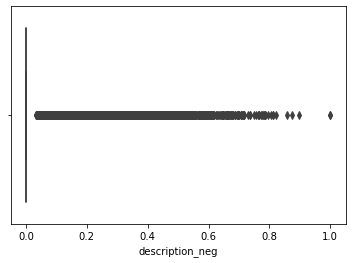

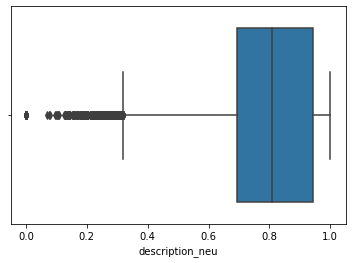

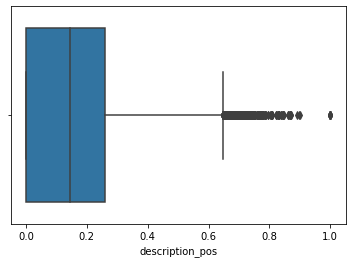

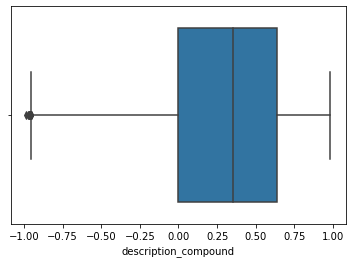

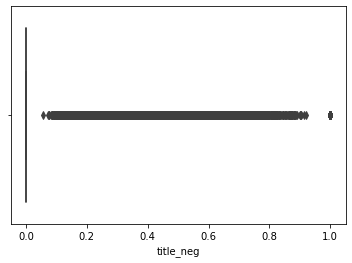

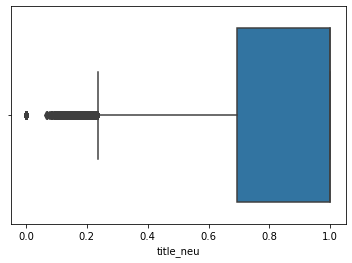

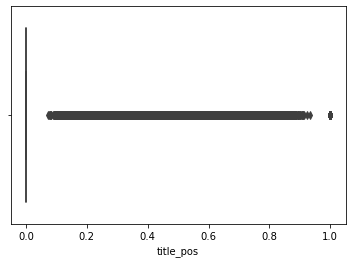

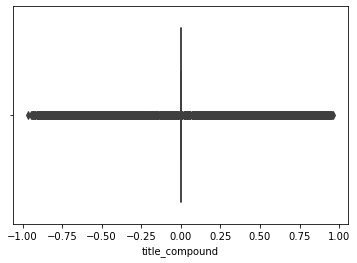

In [19]:
for column in num_df.columns:
    sns.boxplot(num_df[column])
    plt.show()

### deal with outliers in num_df

## scaling


- `Standard scaler`: Removes the mean and scales the data to unit variance. For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.
- `Min-max scaler`: It scales the data in the range of [0,1]. For each column, each value in the column is subtracted by the max of the column and then divided by the difference of max and min of the column. It is very sensitive to the presence of outliers.
- `Normalize`: It rescales the vector to have a unit norm. This means that, for each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance.


### define columns to scale

### StandardScaler

In [65]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numerical)
x_min_max = transformer.transform(numerical)
x_min_max

### Normalizer

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numerical)
x_normalized = transformer.transform(numerical)
x_normalized

## data imbalances

### check whether data is imbalanced

successful    101002
failed         75719
Name: state, dtype: int64

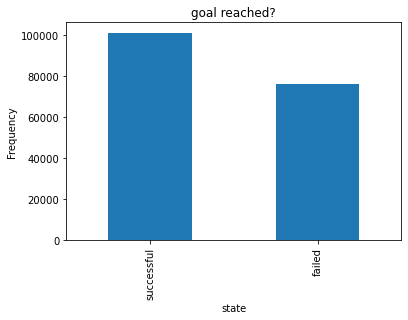

In [25]:
pd.value_counts(df['state']).plot.bar()
plt.title('goal reached?')
plt.xlabel('state')
plt.ylabel('Frequency')
df['state'].value_counts()

**YES** the data is a bit unbalanced as there are 101.002 (57.15%) successful and only 75.719 (42.85%) failed projects.

In [26]:
successful=101002
failed=75719
total=successful+failed

In [27]:
failed/total

0.42846633959744457

In [28]:
successful/total

0.5715336604025555

### deal with imbalances

#### Manual upsampling

In [3]:
successful = df[df['state'] == 'successful'].sample(100000)
failed = df[df['state'] == 'failed'].sample(100000, replace=True)

upsampled = pd.concat([successful, failed]).sample(frac=1)
upsampled

goal       state category_parent_name created_at_weekday  \
75038   11000.0  successful              Fashion            Tuesday   
117867  18150.0  successful              Fashion            Tuesday   
21367     400.0  successful               Design             Monday   
126329  20000.0      failed               Design           Thursday   
145047  50000.0      failed           Technology            Tuesday   
...         ...         ...                  ...                ...   
47708    3000.0  successful           Technology             Friday   
155248  10000.0  successful               Design            Tuesday   
5889     5000.0  successful                 Food             Friday   
127595   6000.0      failed                 Food            Tuesday   
94053   10000.0      failed           Technology          Wednesday   

       launched_at_weekday deadline_weekday  project_duration  \
75038             Thursday         Saturday         30.000000   
117867            Thursday         Saturday         30.000000   
21367            Wednesday           Friday         30.000000   
126329             Tuesday           Friday         66.076100   
145047           Wednesday           Sunday         60.000000   
...                    ...              ...               ...   
47708               Monday         Saturday         47.022778   
155248             Tuesday           Friday         23.712153   
5889               Tuesday         Thursday         30.000000   
127595           Wednesday           Friday         29.958333   
94053             Thursday         Saturday         30.000000   

       blurb_language_new name_language_new country_new  ...  title_word  \
75038                  en                en          AU  ...           7   
117867                 en                en          US  ...          14   
21367                  en                en          GB  ...           3   
126329                 en                en          US  ...          12   
145047                 en                pl          CA  ...           1   
...                   ...               ...         ...  ...         ...   
47708                  en                en          US  ...           6   
155248                 en                it          US  ...           8   
5889                   en                en          US  ...          11   
127595                 en                en          US  ...           2   
94053                  en                en          DE  ...           9   

        title_sent  description_neg  description_neu  description_pos  \
75038            1            0.000            1.000            0.000   
117867           1            0.000            0.862            0.138   
21367            1            0.000            1.000            0.000   
126329           1            0.232            0.608            0.160   
145047           1            0.000            1.000            0.000   
...            ...              ...              ...              ...   
47708            1            0.000            1.000            0.000   
155248           1            0.000            1.000            0.000   
5889             2            0.000            0.523            0.477   
127595           1            0.128            0.872            0.000   
94053            1            0.000            1.000            0.000   

        description_compound  title_neg  title_neu  title_pos  title_compound  
75038                 0.0000        0.0      1.000      0.000          0.0000  
117867                0.4939        0.0      1.000      0.000          0.0000  
21367                 0.0000        0.0      1.000      0.000          0.0000  
126329               -0.3089        0.0      0.732      0.268          0.5106  
145047                0.0000        0.0      1.000      0.000          0.0000  
...                      ...        ...        ...        ...             ...  
47708                 0.000

#### SMOTE for upsampling

I have decided to upsample the minority class by using SMOTE. Why did I chose this?

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df.drop('state', axis=1)
y = df['state']

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

ValueError: could not convert string to float: 'the United States'

#### TomekLinks for downsampling

could be good because of the relatively small imbalance

In [ ]:
from imblearn.under_sampling import TomekLinks

X = df.drop('state', axis=1)
y = df['state']

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

## encode categoricals

In [33]:
df.to_csv('test_df.csv', index=False)

In [2]:
df = pd.read_csv('test_df.csv')

In [4]:
y = upsampled['state']
X = upsampled.drop(['state'], axis=1)

In [5]:
from src.model_functions import encode_categoricals

X = encode_categoricals(X)

In [6]:
X

category_parent_name_Art  category_parent_name_Comics  \
75038                          0                            0   
117867                         0                            0   
21367                          0                            0   
126329                         0                            0   
145047                         0                            0   
...                          ...                          ...   
47708                          0                            0   
155248                         0                            0   
5889                           0                            0   
127595                         0                            0   
94053                          0                            0   

        category_parent_name_Crafts  category_parent_name_Dance  \
75038                             0                           0   
117867                            0                           0   
21367                             0                           0   
126329                            0                           0   
145047                            0                           0   
...                             ...                         ...   
47708                             0                           0   
155248                            0                           0   
5889                              0                           0   
127595                            0                           0   
94053                             0                           0   

        category_parent_name_Design  category_parent_name_Fashion  \
75038                             0                             1   
117867                            0                             1   
21367                             1                             0   
126329                            1                             0   
145047                            0                             0   
...                             ...                           ...   
47708                             0                             0   
155248                            1                             0   
5889                              0                             0   
127595                            0                             0   
94053                             0                             0   

        category_parent_name_Film & Video  category_parent_name_Food  \
75038                                   0                          0   
117867                                  0                          0   
21367                                   0                          0   
126329                                  0                          0   
145047                                  0                          0   
...                                   ...                        ...   
47708                                   0                          0   
155248                                  0                          0   
5889                                    0                          1   
127595                                  0                          1   
94053                                   0                          0   

        category_parent_name_Games  category_parent_name_Journalism  ...  \
75038                            0                                0  ...   
117867                           0                                0  ...   
21367                            0                                0  ...   
126329                           0                                0  ...   
145047                           0                                0  ...   
...                            ...                              ...  ...   
47708                            0                                0  ...   
155248                           0                                0  ...   
5889                             0          

## MODELS

### LogisticRegression

In [15]:
from src.model_functions import classification_LogisticRegression

classification_LogisticRegression(X, y)

ValueError: could not convert string to float: 'failed'

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
model = LogisticRegression(max_iter=1000)

In [18]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
model.score(X_test, y_test)

0.57732

In [20]:
predictions = model.predict(X_test)

In [21]:
predictions

array(['failed', 'successful', 'successful', ..., 'failed', 'successful',
       'failed'], dtype=object)

In [22]:
# to get predictions
predictions = model.predict(X_test)
predictions

array(['failed', 'successful', 'successful', ..., 'failed', 'successful',
       'failed'], dtype=object)

In [23]:
y_test

148282        failed
133584        failed
151412    successful
46621         failed
139493    successful
             ...    
37795         failed
67653         failed
160986        failed
33331     successful
27955         failed
Name: state, Length: 50000, dtype: object

In [24]:
# to get the probability instead
predictions_ = model.predict_proba(X_test)
predictions_

array([[0.64540624, 0.35459376],
       [0.45279158, 0.54720842],
       [0.48496985, 0.51503015],
       ...,
       [0.67008252, 0.32991748],
       [0.44487175, 0.55512825],
       [0.61542106, 0.38457894]])

### DecisionTreeClassifier

In [35]:
from src.model_functions import classification_tree

classification_tree(X, y)

ValueError: could not convert string to float: 'successful'

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
model = DecisionTreeClassifier()

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
model.score(X_test, y_test)

0.75428

In [13]:
predictions = model.predict(X_test)

In [21]:
predictions

array(['successful', 'failed', 'successful', ..., 'failed', 'successful',
       'successful'], dtype=object)

In [22]:
import collections, numpy
collections.Counter(predictions)

Counter({'successful': 21725, 'failed': 28275})

<AxesSubplot:>

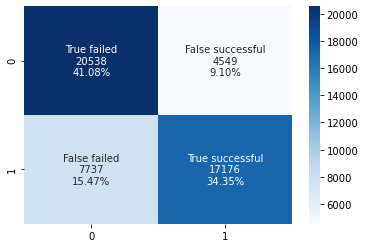

In [26]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True failed', 'False successful','False failed', 'True successful']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### KNeighborsRegressor

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [38]:
model = KNeighborsRegressor(n_neighbors=4)

In [39]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [40]:
model.score(X_test, y_test)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## evaluation of the model

### Logistic Regression Metrics

Concepts:
- Sensitivity: True Positives rate = TP/(TP+FN)
- Specificity: True Negatives rate = TN/(TN+FP)

There are many metrics to aid us on evaluating our model. 
Some famous ones are:
- Accuracy = (TP + TN)/(TP+TN+FP+FN);
- AUC-ROC (Area Under the Curve - Receiver Operating Characteristics);
- F1 score = 2*(precision * recall)/(precision+recall);
- Precision = TP/(TP+FP) - when you rather be sure it is a positive;
- Recall (sensitivity) = TP/(TP+FN) - when we want to get most positives as possible.

More metrics and when to use each: [here](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226).

## conclusion

 - best working model
 - most important variables
 - keyword analysis